<a href="https://colab.research.google.com/github/ambitious08/git1/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
import nltk

In [5]:
data = pd.read_csv('/content/IMDB Dataset.csv')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [8]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [9]:
positive_reviews = data[data['sentiment'] == 'positive']['review']
negative_reviews = data[data['sentiment'] == 'negative']['review']

positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

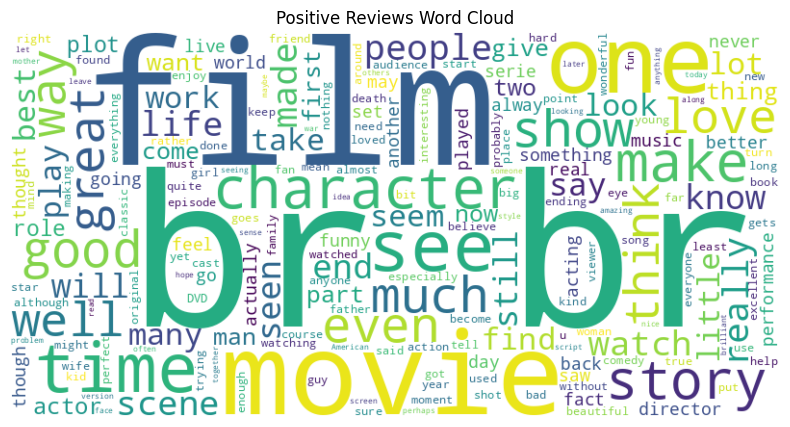

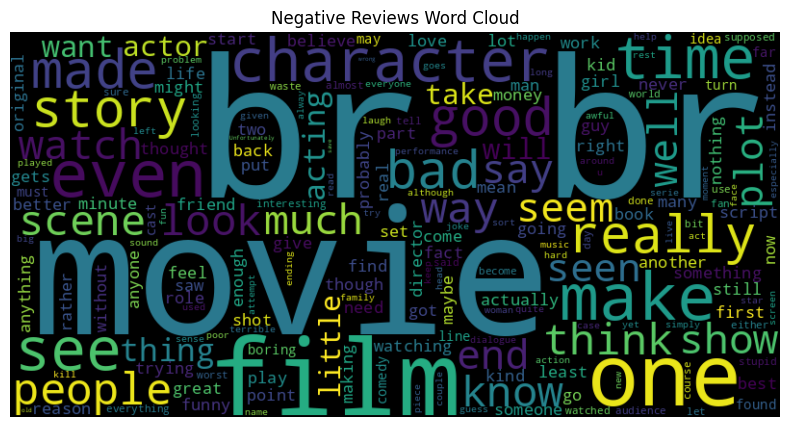

In [10]:
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

In [11]:
from sklearn.decomposition import PCA


In [12]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

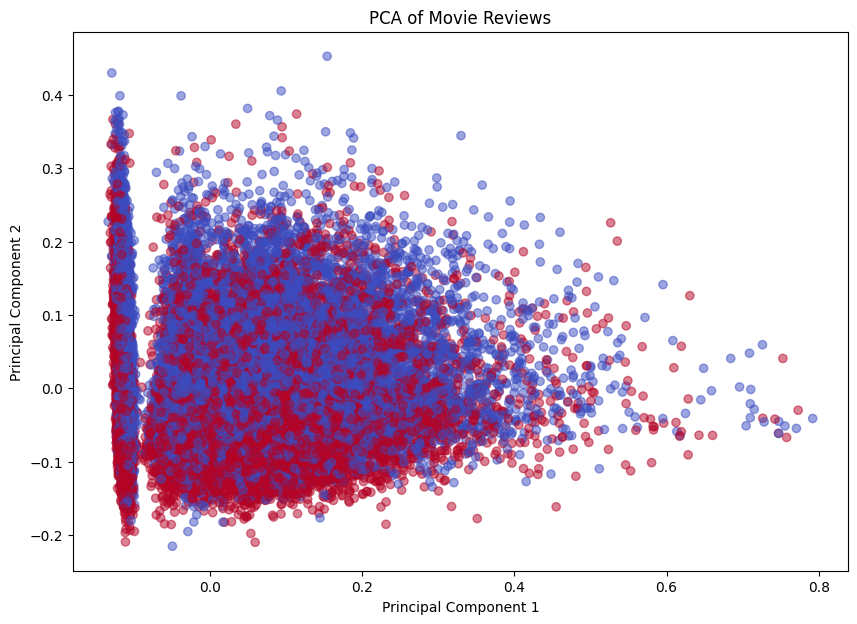

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=(y_train == 'positive'), cmap='coolwarm', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Movie Reviews')
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [15]:
model = LogisticRegression(random_state=42)
model.fit(X_train_pca, y_train)


LogisticRegression(random_state=42)

In [16]:
y_pred = model.predict(X_test_pca)

In [17]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2704 2257]
 [1692 3347]]
              precision    recall  f1-score   support

    negative       0.62      0.55      0.58      4961
    positive       0.60      0.66      0.63      5039

    accuracy                           0.61     10000
   macro avg       0.61      0.60      0.60     10000
weighted avg       0.61      0.61      0.60     10000

